# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D,GlobalMaxPooling2D,AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


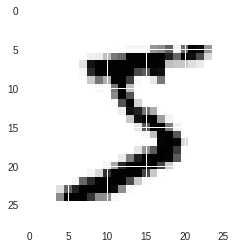

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
model = Sequential()
model.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Convolution2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

AveragePooling2D(data_format=None)
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=5, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/5
60000/60000 [==============================] - 48s 792us/step - loss: 0.1382 - acc: 0.9576
Epoch 2/5
60000/60000 [==============================] - 44s 734us/step - loss: 0.0433 - acc: 0.9864
Epoch 3/5
60000/60000 [==============================] - 44s 732us/step - loss: 0.0303 - acc: 0.9906
Epoch 4/5
60000/60000 [==============================] - 41s 689us/step - loss: 0.0228 - acc: 0.9928
Epoch 5/5
60000/60000 [==============================] - 44s 731us/step - loss: 0.0176 - acc: 0.9941


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [13]:
print(score)

[0.030389560681051808, 0.991]


In [0]:
X_test[0].shape

(28, 28, 1)

In [0]:
# def upload_files():
#   from google.colab import files
#   uploaded = files.upload()
#   for k, v in uploaded.items():
#     open(k, 'wb').write(v)
#   return list(uploaded.keys())

In [0]:
from google.colab import files


In [0]:
from IPython.display import Image

In [18]:
uploaded = files.upload()

Saving digit_num_1.jpg to digit_num_1 (1).jpg


In [0]:
#y_pred = model.predict(X_test)

In [0]:
 from PIL import Image

In [0]:
pil_image=Image.open('digit_num_1 (1).jpg').convert('LA')

In [39]:
pil_image.size

(3480, 4640)

In [0]:
foo = pil_image.resize((28,28),Image.ANTIALIAS)

In [28]:
foo.size

(28, 28)

In [0]:


# Method to process the red band

def pixelProcRed(intensity):

    return 0

 

# Method to process the blue band

def pixelProcBlue(intensity):

    return intensity

 

# Method to process the green band

def pixelProcGreen(intensity):

    return 0

In [41]:
foo

In [34]:
foo.convert('LA')

In [0]:
from scipy.misc import imsave

In [0]:
#credits https://stackoverflow.com/questions/9506841/using-python-pil-to-turn-a-rgb-image-into-a-pure-black-and-white-image
import numpy


def binarize_image(img_path, target_path, threshold):
    """Binarize an image."""
    image_file = Image.open(img_path)
    image = image_file.convert('L')  # convert image to monochrome
    image = numpy.array(image)
    image = binarize_array(image, threshold)
    imsave(target_path, image)


def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array

In [51]:
ls

'digit_num_1 (1).jpg'   weights00000006.h5   weights00000036.h5
 digit_num_1.jpg        weights00000016.h5
 sample_data/           weights00000026.h5


In [113]:
binarize_image('digit_num_1 (1).jpg','result1.jpg',100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [70]:
ls

'digit_num_1 (1).jpg'   result.jpg           weights00000016.h5
 digit_num_1.jpg        sample_data/         weights00000026.h5
 result1.jpg            weights00000006.h5   weights00000036.h5


In [0]:
output_image=Image.open('result1.jpg')
#result.jpg

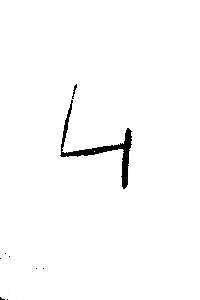

In [115]:
output_image.resize((200,300))

In [0]:
d_out=output_image.resize((28,28))

In [117]:
d_out

In [0]:
import PIL.ImageOps
inverted_image=PIL.ImageOps.invert(d_out)

In [0]:
invert_2=inverted_image.convert('1')

In [125]:
invert_2

In [0]:
arr1=np.array(invert_2)
img_1=arr1.astype(float)
img_2 = img_1[..., np.newaxis]
final=img_2[np.newaxis,...]

In [127]:
final.shape

(1, 28, 28, 1)

In [128]:
model.predict(final)

array([[2.7703519e-03, 4.3804520e-03, 3.2346852e-03, 6.5647565e-02,
        2.8214974e-02, 7.0226234e-01, 2.1879170e-04, 1.7591195e-01,
        1.3403402e-03, 1.6018555e-02]], dtype=float32)

In [0]:
#---------------